In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv("second(187).csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    object 
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    int64  
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    object 
 9   Blood Pressure           186 non-null    object 
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
 12  Sleep Disorder           30 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             156
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Person ID -> irrelevant column
# Sleep Disorder -> alot of missing data

df.drop(columns=["Person ID", "Sleep Disorder"], inplace=True)

In [8]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [9]:
# i will apply it in the merge with all the files

# encoder = OneHotEncoder(sparse_output=False)
# occupation_encoded = encoder.fit_transform(df[["Occupation"]])
# occupation_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(["Occupation"]))

# df.drop(columns=["Occupation"], inplace=True)
# df = pd.concat([df.reset_index(drop=True), occupation_df], axis=1)

In [10]:
df["BMI Category"].value_counts()

BMI Category
Normal           144
Overweight        23
Normal Weight     17
Obese              2
Name: count, dtype: int64

In [11]:
df["BMI Category"] = df["BMI Category"].replace("Normal Weight", "Normal")

In [12]:
df["BMI Category"].value_counts()

BMI Category
Normal        161
Overweight     23
Obese           2
Name: count, dtype: int64

In [13]:
bmi_mapping = {
    "Underweight": 0,
    "Normal": 1,
    "Overweight": 2,
    "Obese": 3
}

df["BMI Category"] = df["BMI Category"].map(bmi_mapping)

In [14]:
# Convert "Blood Pressure Ratio" from string ("126/82") to numeric (1.51)

df['Blood Pressure'] = df['Blood Pressure'].apply(lambda df: eval(df) if isinstance(df, str) else df)

In [15]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,0,59,Nurse,8.1,9,75,3,2,1.473684,68,7000
1,1,29,Doctor,7.8,7,75,6,1,1.500000,70,8000
2,1,29,Doctor,7.8,7,75,6,1,1.500000,70,8000
3,1,29,Doctor,6.1,6,30,8,1,1.500000,70,8000
4,1,29,Doctor,7.8,7,75,6,1,1.500000,70,8000


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'BMI Category'}>,
        <Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

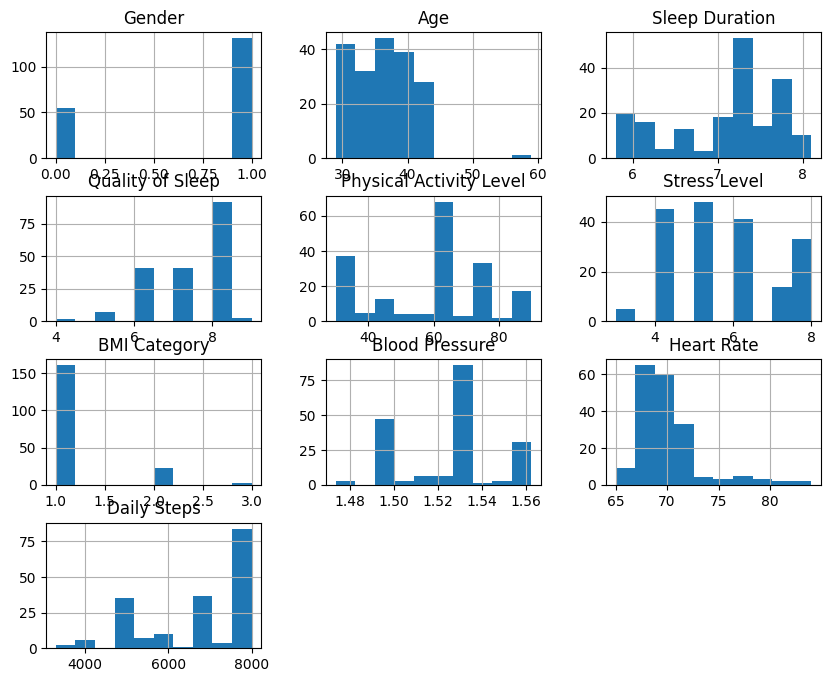

In [16]:
df.hist(figsize=(10, 8))

In [17]:
# we do not have outliers
# =======================

numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }

    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

for col, info in outliers.items():
    print(f"\nOutlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")


Outlier Analysis for: Gender
Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Age
Q1: 32.0, Q3: 39.0, IQR: 7.0
Lower Bound: 21.5, Upper Bound: 49.5
Number of Outliers: 1
Outliers: [59]


Outlier Analysis for: Sleep Duration
Q1: 6.6, Q3: 7.6, IQR: 1.0
Lower Bound: 5.1, Upper Bound: 9.1
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Quality of Sleep
Q1: 6.0, Q3: 8.0, IQR: 2.0
Lower Bound: 3.0, Upper Bound: 11.0
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Physical Activity Level
Q1: 45.0, Q3: 75.0, IQR: 30.0
Lower Bound: 0.0, Upper Bound: 120.0
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Stress Level
Q1: 4.0, Q3: 6.75, IQR: 2.75
Lower Bound: -0.125, Upper Bound: 10.875
Number of Outliers: 0
Outliers: []


Outlier Analysis for: BMI Category
Q1: 1.0, Q3: 1.0, IQR: 0.0
Lower Bound: 1.0, Upper Bound: 1.0
Number of Outliers: 25
Outliers: [2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2

In [18]:
df.to_csv('second_clean.csv', index=False)